In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
from scipy.optimize import curve_fit
from scipy.special import erf
from matplotlib.ticker import FormatStrFormatter, LogFormatter

In [2]:
ER = np.genfromtxt(r"D:\file\Research\P-value\data\ATER")    # Generating array for empirical data from file.  ER has 499 data points
ERDD = np.genfromtxt(r"D:\file\Research\P-value\data\ATERDD") 
GEO = np.genfromtxt(r"D:\file\Research\P-value\data\ATGEO") 
GEOGD = np.genfromtxt(r"D:\file\Research\P-value\data\ATGEOGD") 
HGG = np.genfromtxt(r"D:\file\Research\P-value\data\ATHGG") 
SF = np.genfromtxt(r"D:\file\Research\P-value\data\ATSF") 
SFDD = np.genfromtxt(r"D:\file\Research\P-value\data\ATSFDD") 
Sticky = np.genfromtxt(r"D:\file\Research\P-value\data\ATSticky")
ATOriginal = np.genfromtxt(r"D:\file\Research\P-value\data\ATOriginal") 

In [3]:
# calculating empirical data's shortest(NN) distance 
# real data is high-dimensional data points

# Revised Version. Now output correct data distance
def data_distance(data):
    shortest_distance = [0]*len(data)
    for i in range(len(data)):
        x = np.delete(data,i,0)
        temp = (x-data[i])**2
        d = np.sqrt(np.sum(temp,axis=1))
        shortest_distance[i] = d.min()
    
    return np.array(shortest_distance)   # return an array of real data's NN distance

# plotting empirical data's NN hist
def plot_data_distance(D, title):
    """
    D: an array of real data' NN distance
    """
    f, ax = plt.subplots(1,1, figsize = (8,6))
    ax.hist(D,edgecolor='white',bins=50)   ## consider specifying <bins>
    ax.set_title(title)
    plt.show()
    return

In [4]:
# plot CDF of empirical data
def plot_empirical_CDF(data, Density,title):
    f, ax = plt.subplots(1,1,figsize=(6,4))
    h = ax.hist(data,bins=len(data),density=Density,cumulative=True,histtype='stepfilled')    # bins set to equal to # of empirical data
    x = h[1][:-1]
    y = h[0]
    ax.plot(x,y,color='k', label='Empirical')
    ax.set_title(title)
    ax.legend()
    plt.show()
    return x,y

In [5]:
# plot CDF of empirical data + fitted Sigmoid
def plot_sigmoid(data,Density, func, param):
    f, ax = plt.subplots(1,1,figsize=(10,8))
    h = ax.hist(data,bins=499,density=Density,edgecolor='white',cumulative=True,histtype='step')
    x = h[1][:-1]
    y = h[0]

    y2 = func(x/1e7,*param)    # by func curve_fit
    #ax.plot(x,y,color='k', label='Empirical')
    #ax.plot(x,y2,color='r',label='sigmoid')
    ax.set_yscale('log')
    #ax.plot(x[:-100],1-y[:-100],color='g',label='1-empirical')
    ax.scatter(x,1-y,color='g',label='1-empirical')
    ax.plot(x,1-y2,color='y',label='1-sigmoid')
    ax.legend(loc='upper left')
    plt.show()
    return x,y,y2

In [6]:
data_list = [ER,ERDD,GEO,GEOGD,HGG,SF,SFDD,Sticky]      # all read-in empirical AT data
data_name = ['ER','ERDD','GEO','GEOGD','HGG','SF','SFDD','Sticky']
factor = [1e5,1e7,1e4,1e7,1e13,1e8,1e9,1e9]
colors = ['b','g','r','c','m','y','k','brown']

In [7]:
# Curve_fit 2.0: function 

def auto_curve_fit(data_NN, x, y, x_scale_factor, func,s=None):
    
    p0 = [np.median(data_NN)/x_scale_factor,1,-1] # this is initial guess for curve_fit()

    popt, pcov = curve_fit(f=func, xdata=x/x_scale_factor, ydata=y, p0=p0,method='lm', sigma=s)

    # parameters yielded by Curve_fit: x0, k
    print(popt)
    return popt

In [8]:
def sigmoid_preview(func,x,x_scale_factor,popt,name):
    y2 = func(x/x_scale_factor, *popt)
    plt.plot(x/x_scale_factor,y2)
    plt.title(name)
    plt.show()

In [9]:
# display minor yticks, adjusted figsize
def plot_pair2(x, y, x_scale_factor, func, param, name, color):
    '''
    x,y: empirical_NN and probability value
    x_scale_factor: scaling factor observed to avoid func overflowing
    func: sigmoid function
    param: parameters generated by Curve_fit()
    '''
    f,ax = plt.subplots(1,1,figsize=(8,12))
    y2 = func(x/x_scale_factor, *param)
    
    ax.set_yscale('log')
    ax.tick_params(axis='y', which='minor')
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.5e"))
    ax.scatter(x,1-y, color=color,marker='.')
    ax.plot(x,1-y2, color='b', label=name)
    
    ytick = ax.get_yticks()
    ax.legend(loc='upper left')
    plt.show()
    return ytick
    

In [10]:
def logistic(x,x0, k):
    m = (1/ (1 + np.exp(-k*(x-x0))))       # b to better fit left end since it does not reach 0
    return m

def tanh(x, x0, k, b): # for log curve_fit
    m = np.tanh(k*(x-x0))+b
    return m

def arctan(x, x0, k):
    m = (2/np.pi)*np.arctan(k*(x-x0))
    return m

def GD(x, x0, k):
    m = (4/np.pi)*np.arctan(np.tanh(k*(x-x0)))
    return m

def ERF(x, x0, k):
    m = erf(k*(x-x0))
    return m

def algebra(x, x0, k):
    m = x/((1+abs(x)**k)**(1/k))
    return m

### hand-weighted fitting

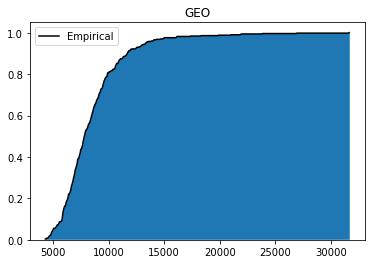

[5.02563345e-01 2.02928363e+00 1.09194897e-03]


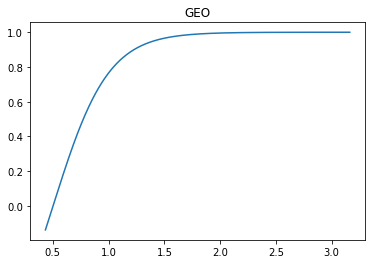

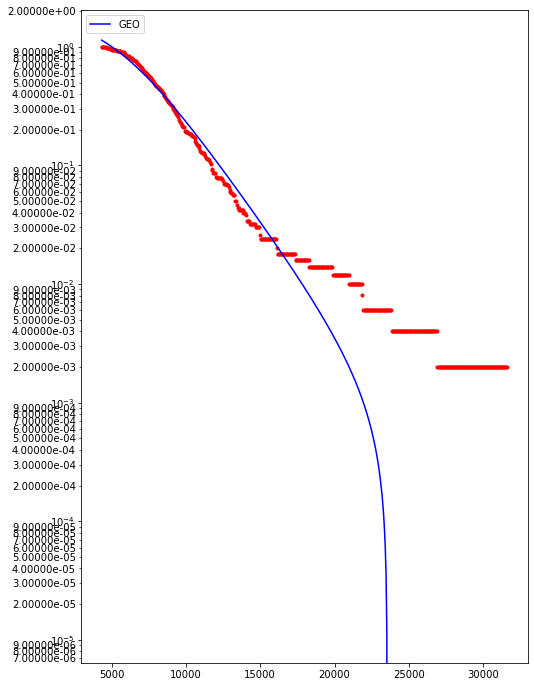

In [11]:
nn_GEO = data_distance(GEO)
x1,y1 = plot_empirical_CDF(nn_GEO,True,"GEO")
popt1 = auto_curve_fit(nn_GEO, x1, y1, 1e4,tanh)
sigmoid_preview(tanh, x1,1e4,popt1,"GEO")
ytick = plot_pair2(x1,y1,1e4,tanh,popt1,"GEO",'r') 


In [12]:
origin = np.array([x1,1-y1])
print(origin.shape)
# taking one point from each tick > 1e-2
less = origin[:,origin[1]<=1e-2]
greater = origin[:,origin[1]>1e-2]
print(greater.shape)
print(less.shape)

(2, 499)
(2, 320)
(2, 179)


In [13]:
bounds = list(range(100,10,-10))+list(range(10,0,-1))
for i in range(len(bounds)-1):
    upper = bounds[i]*1e-2
    lower = bounds[i+1]*1e-2
        
    inter_temp = greater[:,greater[1]<=upper]
    interval = inter_temp[:, inter_temp[1]>lower]
    print("interval length: ",interval.shape[1])
    
    if i == 0:
        new = interval[:,interval.shape[1]//2].reshape((2,1))
    
    else:
        new = np.hstack((new,interval[:,interval.shape[1]//2].reshape((2,1))))  # take mid point of that interval

print(new.shape)

interval length:  28
interval length:  9
interval length:  10
interval length:  9
interval length:  8
interval length:  12
interval length:  12
interval length:  14
interval length:  33
interval length:  2
interval length:  5
interval length:  12
interval length:  5
interval length:  7
interval length:  11
interval length:  17
interval length:  22
interval length:  104
(2, 18)


(2, 197)


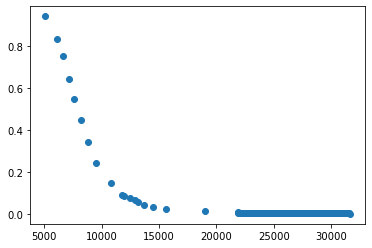

In [14]:
filtered_data = np.hstack((new,less))
print(filtered_data.shape)
f,ax = plt.subplots(1,1)
ax.scatter(filtered_data[0],filtered_data[1])
plt.show()

In [15]:
x2,y2 = filtered_data[0], 1-filtered_data[1]    # y2 is p-value in CDF i.e. increasing to 1
d = np.array([x2,y2]).T
sorted_d = d[np.argsort(d[:,0])].T
s_x2, s_y2 = sorted_d[0],sorted_d[1]

[ 0.51999393  2.14632928 -0.00258994]


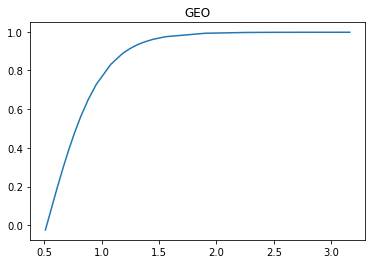

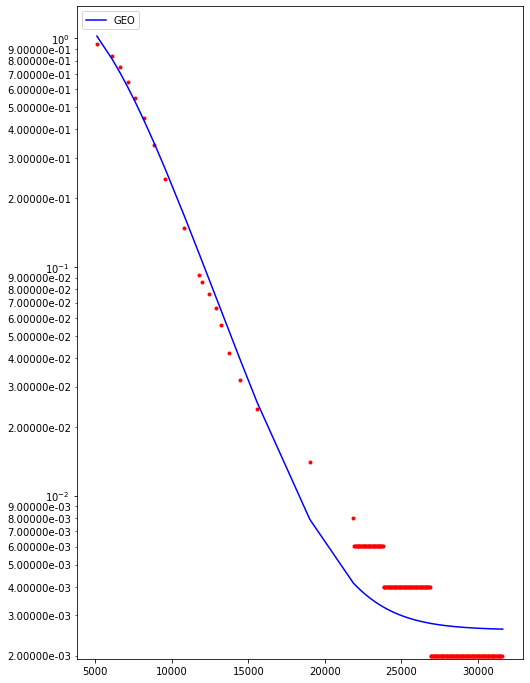

In [16]:
popt2 = auto_curve_fit(nn_GEO, s_x2, s_y2, 1e4,tanh)
sigmoid_preview(tanh, s_x2,1e4,popt2,"GEO")
ytick = plot_pair2(s_x2,s_y2,1e4,tanh,popt2,"GEO",'r') 

### !!!Change curve_fit("sigma") to weight importance
##Ref: https://stackoverflow.com/questions/60884253/how-to-prioritise-some-points-over-others-using-curve-fit-from-scipy

#### per curve_fit() doc
sigma: None or M-length sequence or MxM array, optional
Determines the uncertainty in ydata. If we define residuals as **r = ydata - f(xdata, *popt)**, then the interpretation of sigma depends on its number of dimensions:

A 1-D sigma should contain values of standard deviations of errors in ydata. In this case, the optimized function is **chisq = sum((r / sigma) ** 2).**

#### current sigma = 1-y

## sigma-weighed log curve_fit

In [17]:
def plot_log(x,y):
    f,ax = plt.subplots(1,1)
    ax.scatter(x,y)
    plt.show()

In [11]:
# similar to plot_pair2 , normal ysacle
def plot_pair3(x, y, x_scale_factor, func, param, name, color):
    '''
    x,y: empirical_NN and probability value
    x_scale_factor: scaling factor observed to avoid func overflowing
    func: sigmoid function
    param: parameters generated by Curve_fit()
    '''
    f,ax = plt.subplots(1,1,figsize=(8,12))
    y2 = func(x/x_scale_factor, *param)
    ax.set_yscale('log')
    ax.scatter(x,1-y, color=color,marker='.')
    ax.plot(x,1-y2, color='b', label=name)  #
    
    ytick = ax.get_yticks()
    ax.legend(loc='upper left')
    plt.show()
    return ytick

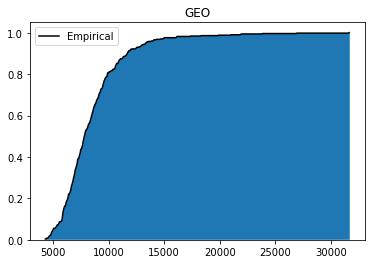

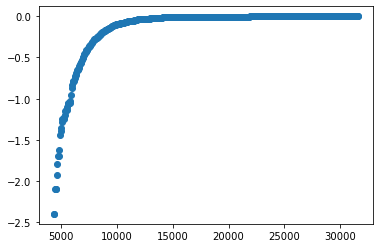

In [19]:
# curve_fit on all empirical data
nn_GEO = data_distance(GEO)
x3,y3 = plot_empirical_CDF(nn_GEO,True,"GEO")
y3_log = np.log10(y3)  # log base = 10

plot_log(x3,y3_log)

In [20]:
popt3_1 = auto_curve_fit(nn_GEO, x3, y3_log, 1e4,tanh)
popt3_2 = auto_curve_fit(nn_GEO,x3,y3_log,1e4,tanh,s=1-y3_log)

[ 0.58751117  5.55104544 -1.02180177]
[ 0.5798955   4.3613051  -1.01079297]


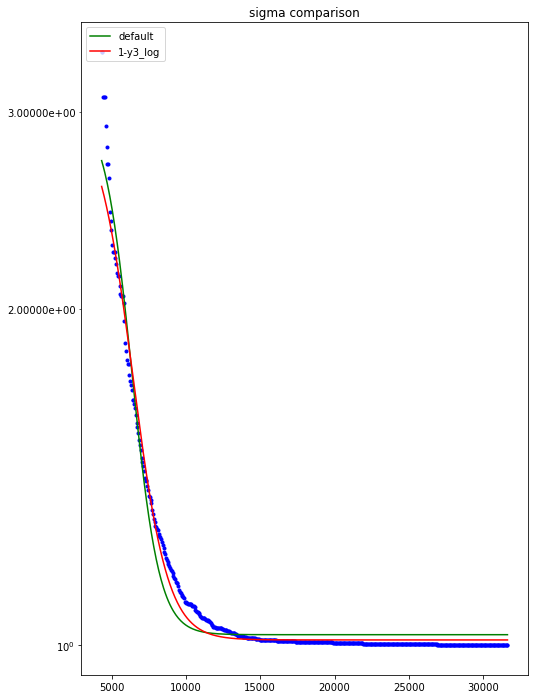

In [21]:
## sigma= default vs. 1-y.   on Log(y)
f,ax = plt.subplots(1,1,figsize=(8,12))
y3_1 = tanh(x3/1e4, *popt3_1)
y3_2 = tanh(x3/1e4, *popt3_2)

ax.set_title("sigma comparison")
ax.set_yscale('log')
ax.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.5e"))
ax.scatter(x3,1-y3_log, color='b',marker='.')
ax.plot(x3,1-y3_1, color='g', label='default')
ax.plot(x3,1-y3_2, color='r', label='1-y3_log')

ax.legend(loc='upper left')
plt.show()


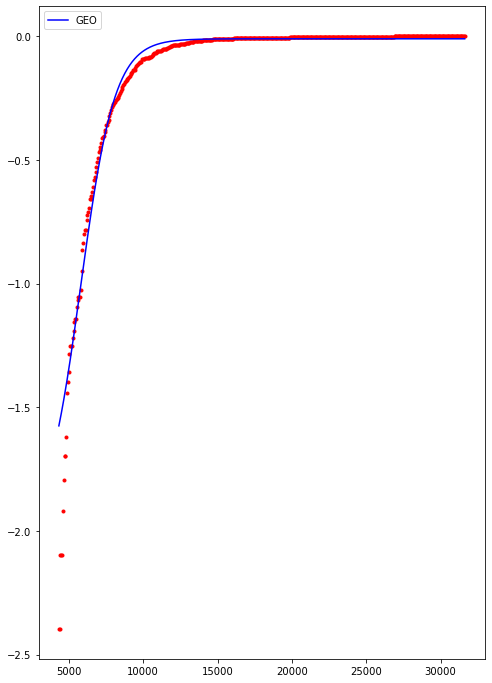

In [22]:
ytick = plot_pair3(x3,y3_log,1e4,tanh,popt3_2,"GEO",'r')   # sigma = 1-y, y-axis=normal scale, on log(y)

### hand-weighted + sigma-weighed log curve_fit()

[-2.94369241  0.5811208  -0.99834488]


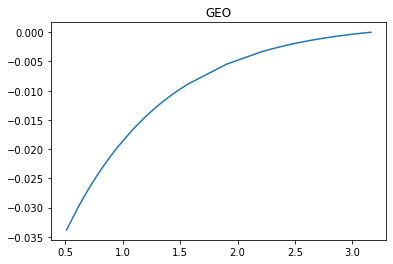

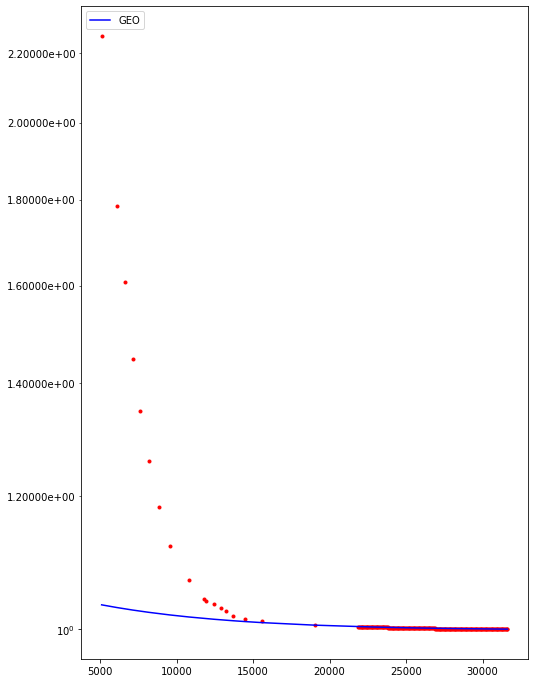

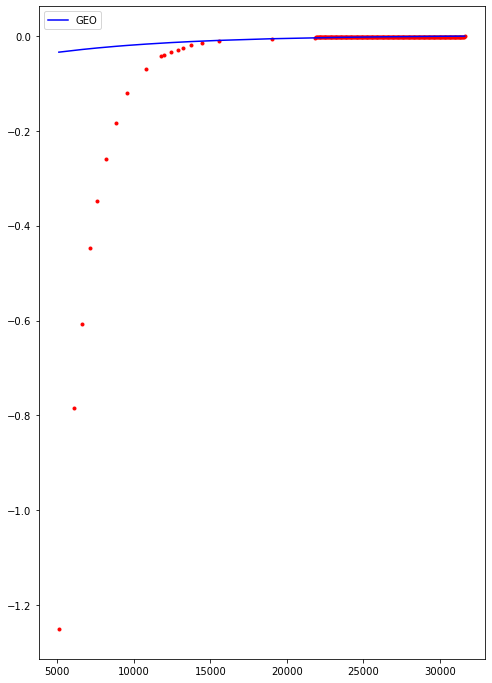

In [32]:
s_y2_log = np.log10(s_y2)
popt4 = auto_curve_fit(nn_GEO, s_x2, s_y2_log, 1e4,tanh,s_y2_log) ##
sigmoid_preview(tanh, s_x2,1e4,popt4,"GEO")
ytick = plot_pair2(s_x2,s_y2_log,1e4,tanh,popt4,"GEO",'r')  # y-axis = log scale
ytick2 = plot_pair3(s_x2,s_y2_log,1e4,tanh,popt4,"GEO",'r') # sigma=1-y, hand-weighted points, y-axis = normal scale

[0.48036014 1.6427361  0.00186417]


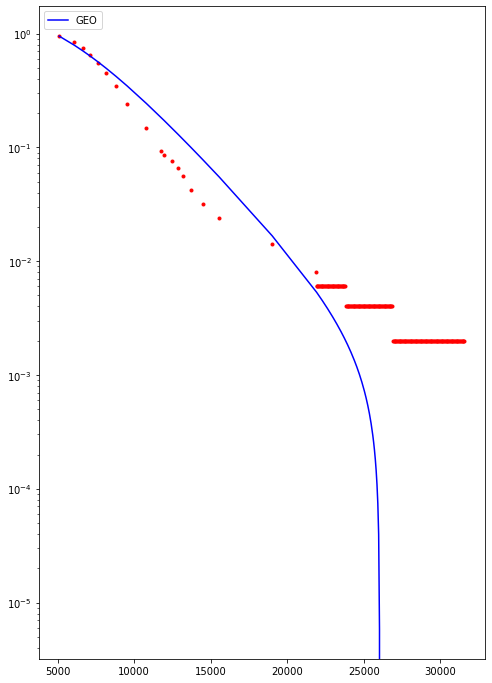

In [40]:
### 2.28 meeting using
popt5 = auto_curve_fit(nn_GEO, s_x2, s_y2, 1e4,tanh,s_y2) ##
ytick3 = plot_pair3(s_x2,s_y2,1e4,tanh,popt5,"GEO",'r')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


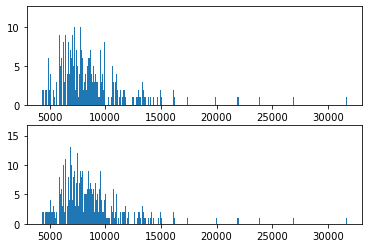

In [44]:
f, ax = plt.subplots(2,1,figsize=(6,4))
h = ax[0].hist(nn_GEO,bins=499,density=False,cumulative=False)
h2 = ax[1].hist(nn_GEO,bins=384,density=False,cumulative=False)
print(h[0][-10::],h2[0][-10::])
plt.show()

In [39]:
len(np.unique(nn_GEO))

384

### (sigma-weighted)* Log curve_fitting for ATs

In [26]:
# 2.0:  Plot 1-empirical_CDF and 1-sigmoid
def plot_pair(x, y, x_scale_factor, func, param, name, color):
    '''
    x,y: empirical_NN and probability value
    x_scale_factor: scaling factor observed to avoid func overflowing
    func: sigmoid function
    param: parameters generated by Curve_fit()
    '''
    f,ax = plt.subplots(1,1,figsize=(8,30))
    y2 = func(x/x_scale_factor, *param)
    
    ax.set_yscale('log')
    ax.tick_params(axis='y', which='minor')
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.5e"))
    ax.scatter(x,1-y, color=color,marker='.')
    ax.plot(x,1-y2, color=color, label=name)
    
    ytick = ax.get_yticks()
    ax.legend(loc='upper left')
    plt.show()
    return ytick

In [27]:
# For each AT: Empirical CDF + Sigmoid Preview + CDF-Sigmoid Pair
def cdf_sigmoid_pair(data_list,data_name,factor,colors,function,s=False):
    x_s = [0]*8
    y_s = [0]*8
    popt_s = [0]*8
    
    for i in range(len(data_list)):
        NN_i = data_distance(data_list[i])
        x_s[i],y_s[i] = plot_empirical_CDF(NN_i,True,data_name[i])
        y_s[i] = np.log10(y_s[i])
        sig = 1-y_s[i] if s else None
        popt_s[i] = auto_curve_fit(NN_i, x_s[i], y_s[i], factor[i],function,s=sig)
        sigmoid_preview(function, x_s[i],factor[i],popt_s[i],data_name[i])
        plot_pair(x_s[i],y_s[i],factor[i],function,popt_s[i],data_name[i],colors[i]) 
    
    return x_s, y_s, popt_s

# All CDF-Sigmoid Pairs in one image.
def pair_in_one(data_name, factor, colors, function, x_s, y_s, popt_s):
    f,ax = plt.subplots(1,1,figsize=(20,10))
    ax.set_yscale('log')
    ax.set_xscale('log')
    for j in range(8):
        y2 = function(x_s[j]/factor[j],*popt_s[j])
        ax.scatter(x_s[j],1-y_s[j],color=colors[j],marker='.')
        ax.plot(x_s[j],1-y2, color=colors[j],label=data_name[j])
    ax.legend(loc='lower left')
    plt.show()

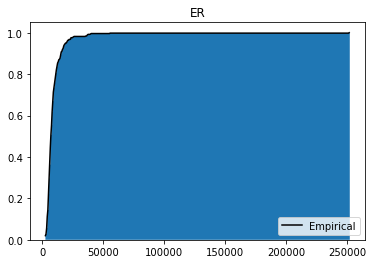

[ 0.04183872 34.92147046 -1.00434516]


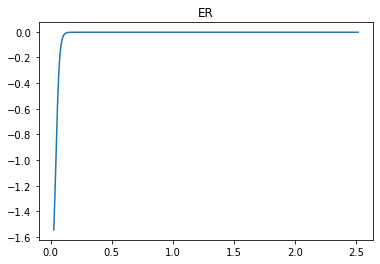

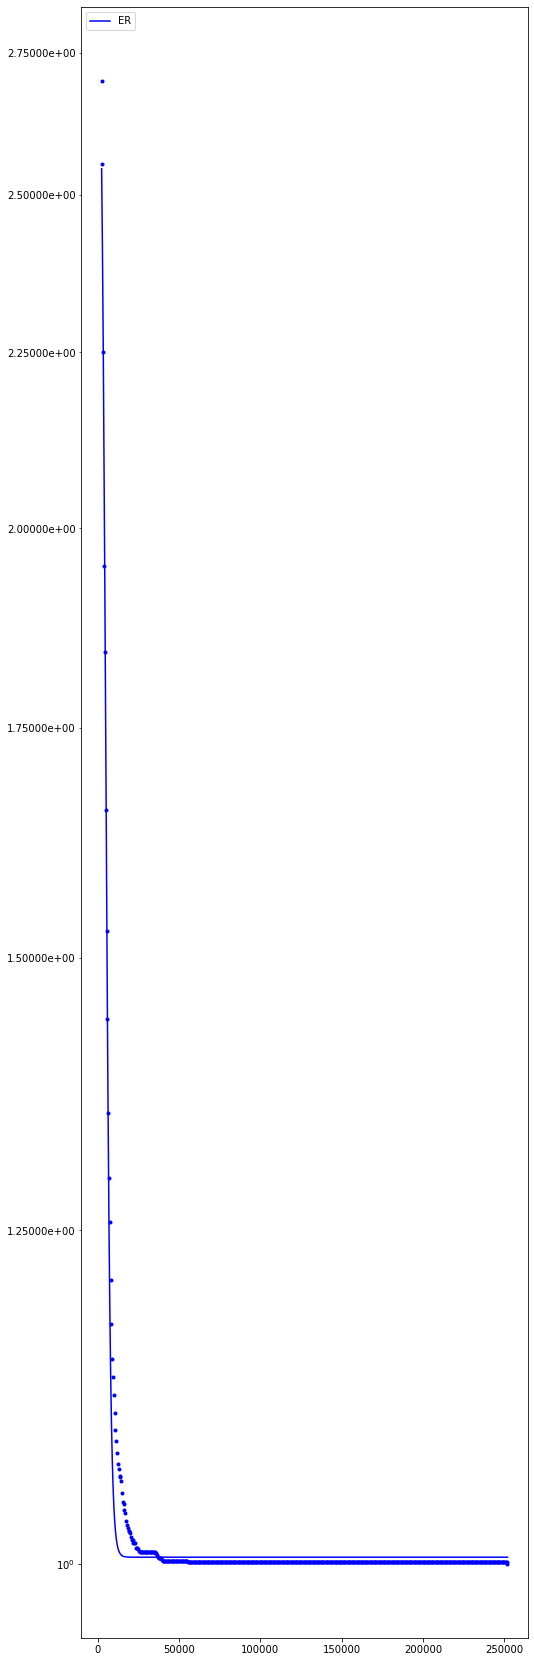

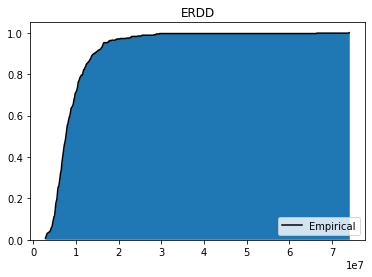

[ 0.49084258  3.53931611 -1.01140617]


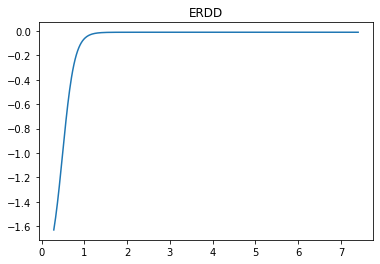

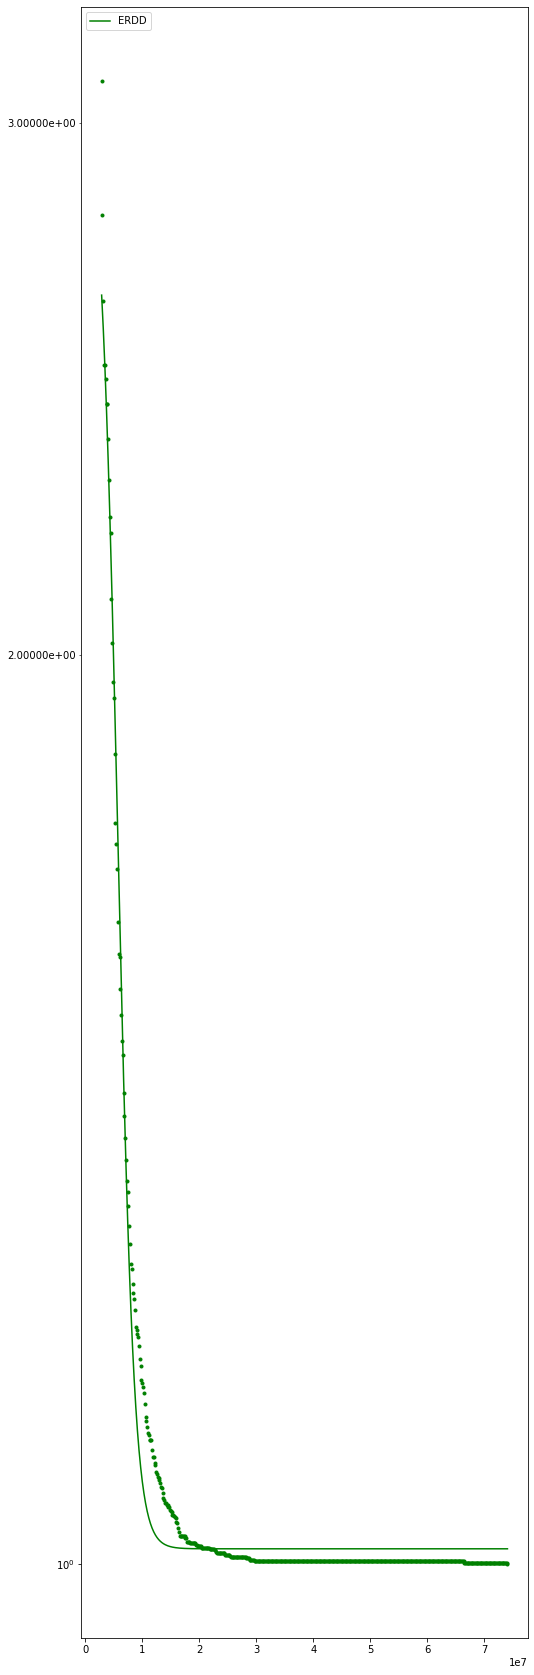

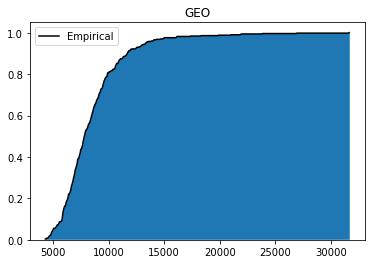

[ 0.58751117  5.55104544 -1.02180177]


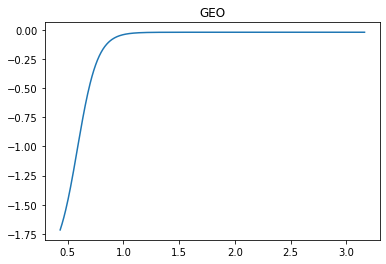

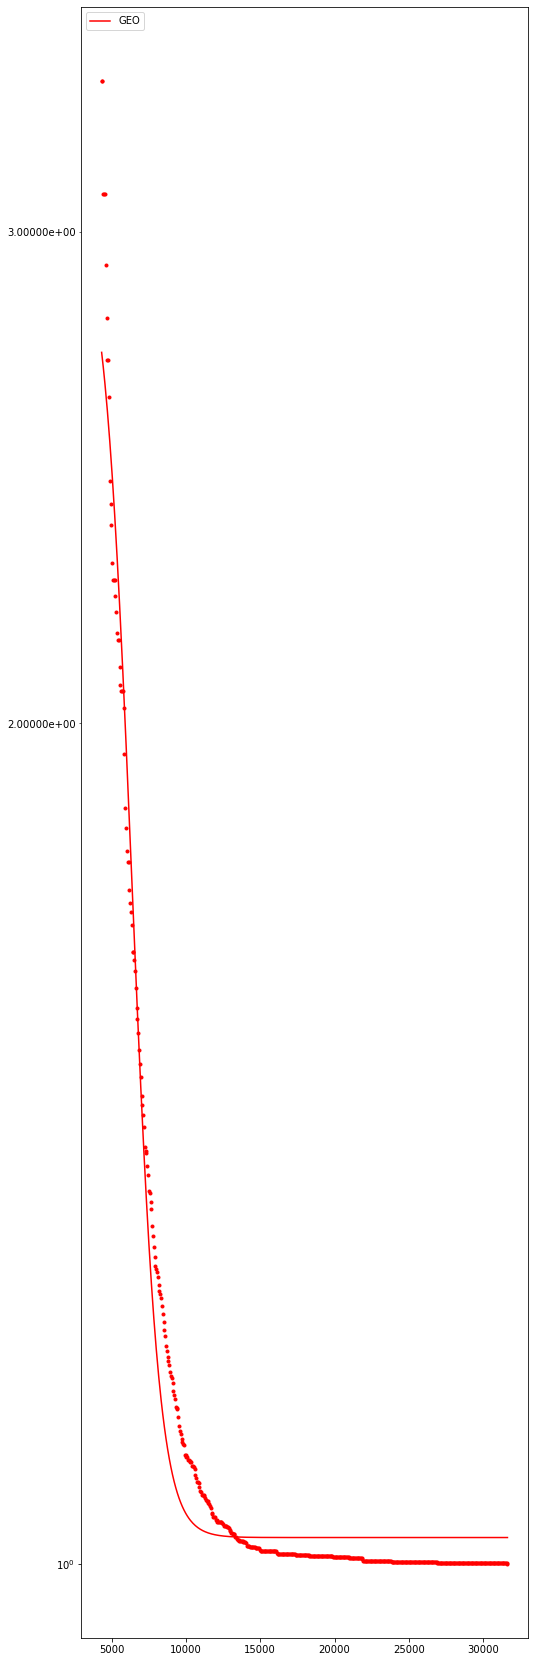

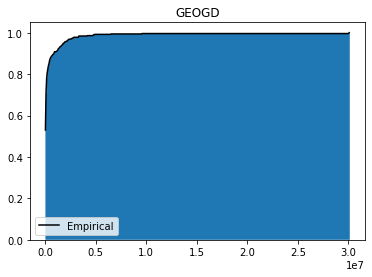

[-0.12987242  9.14429439 -1.00291482]


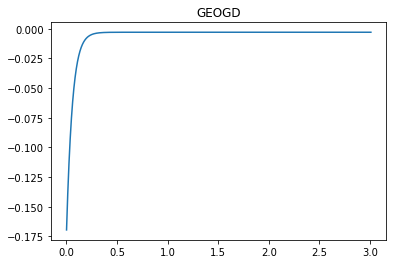

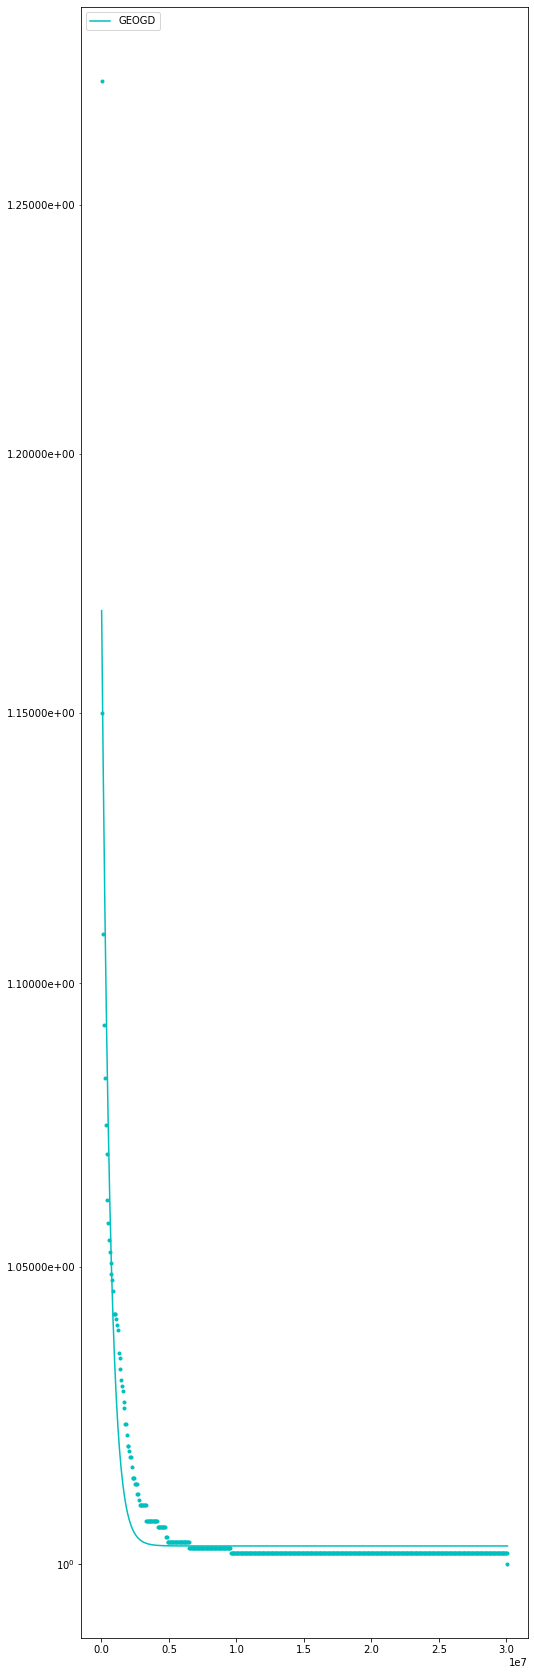

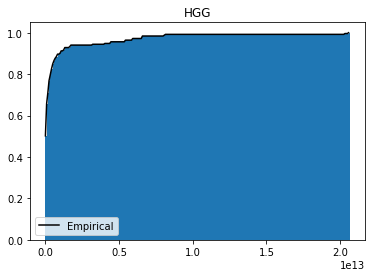

[-0.07632721 13.10281846 -1.00884996]


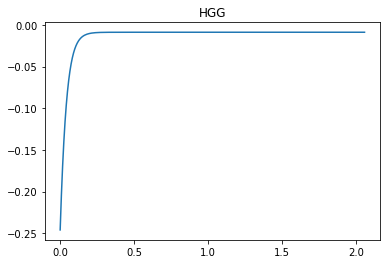

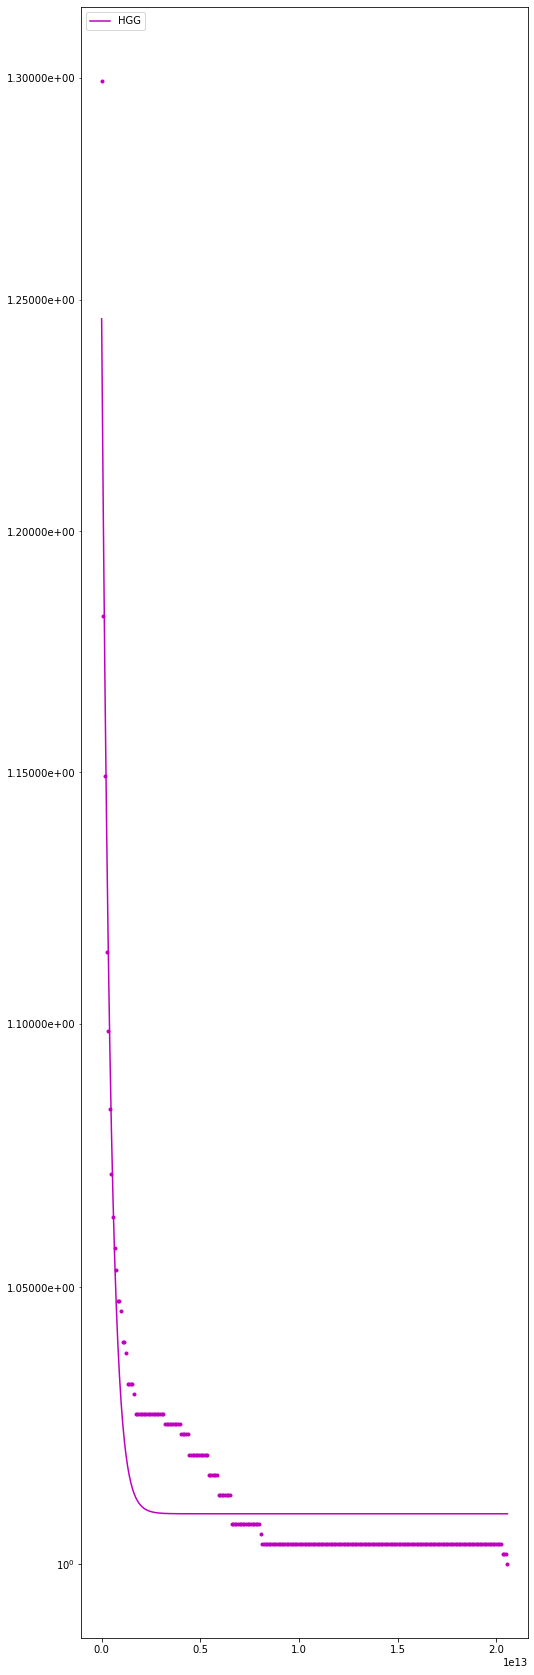

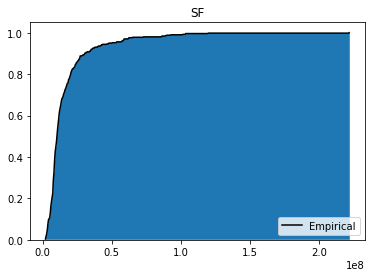

[ 0.05329349 20.44912177 -1.01427549]


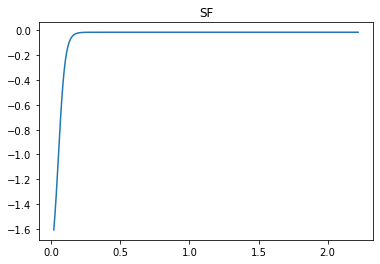

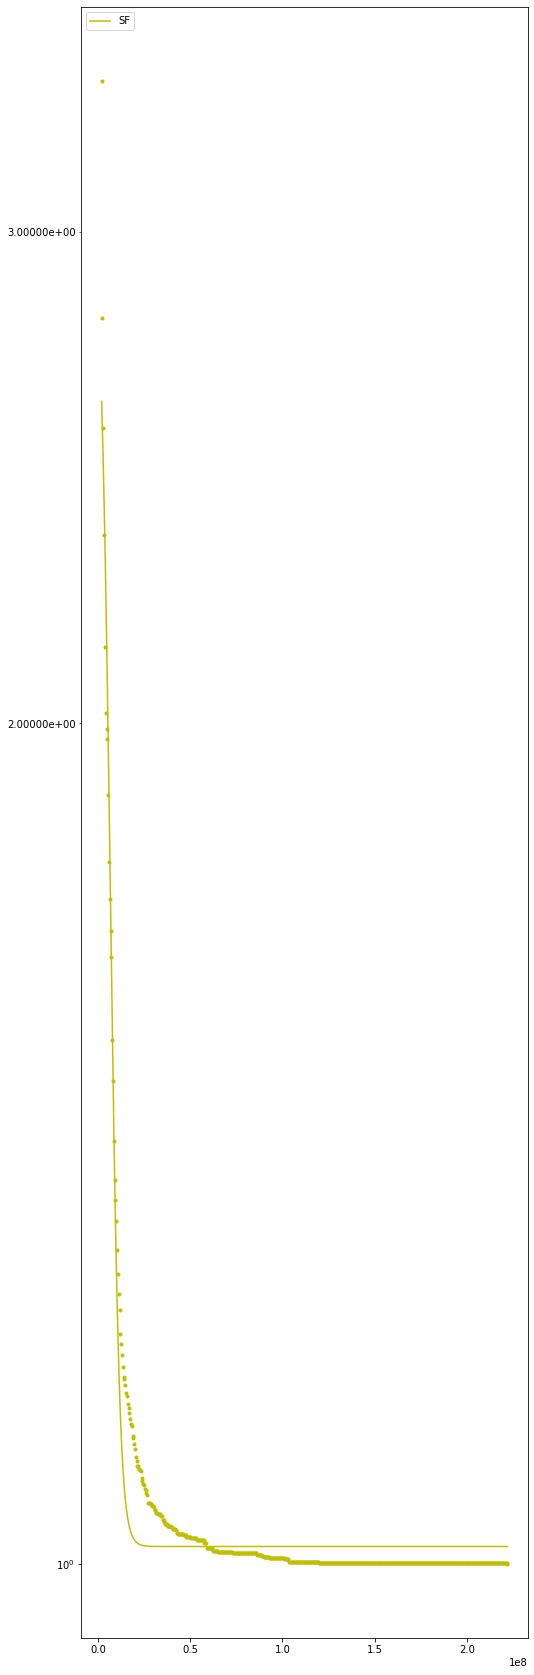

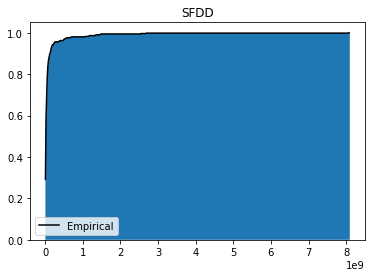

[-0.02483998 19.56616098 -1.00317766]


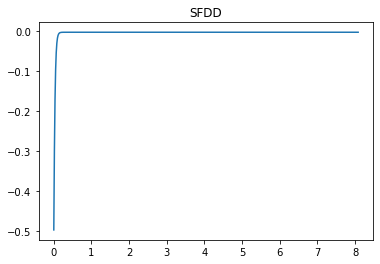

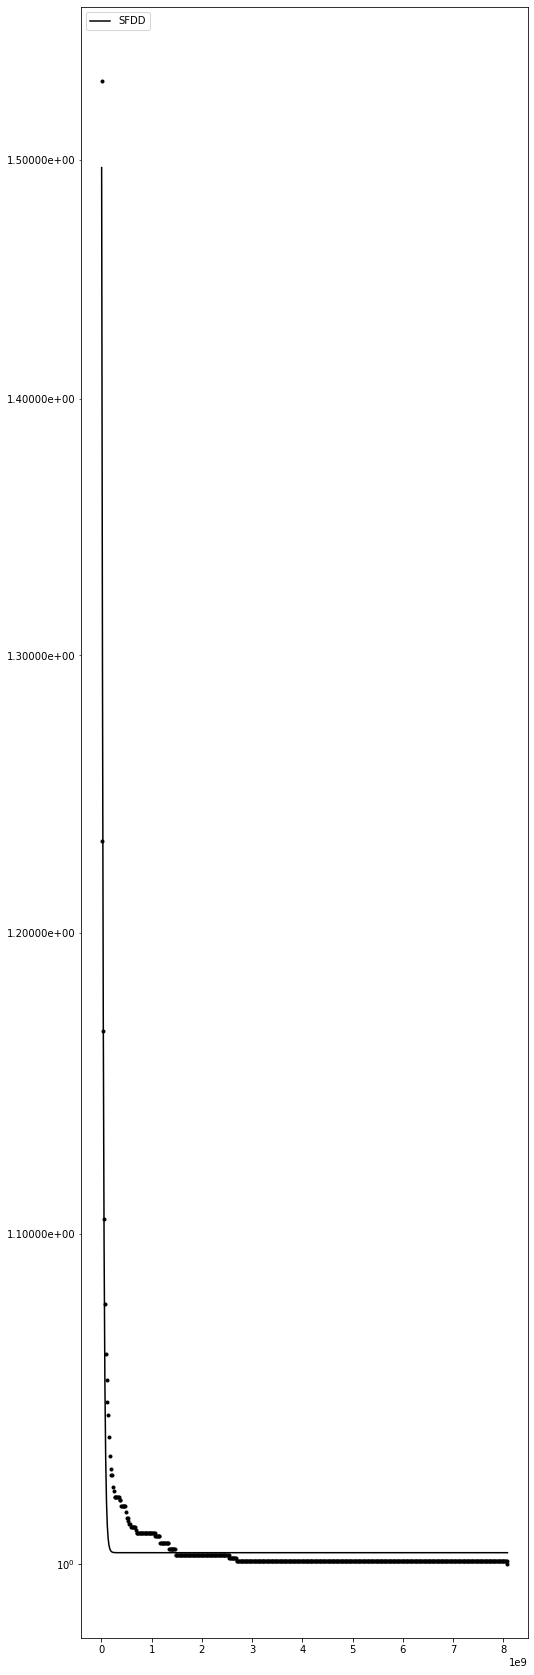

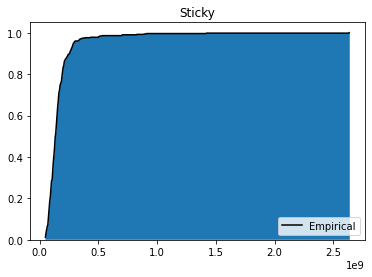

[ 0.07773477 17.61558654 -1.00575164]


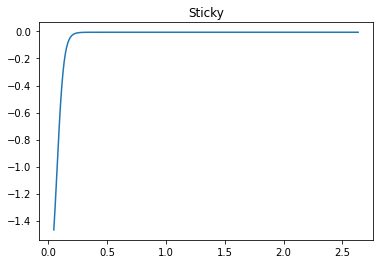

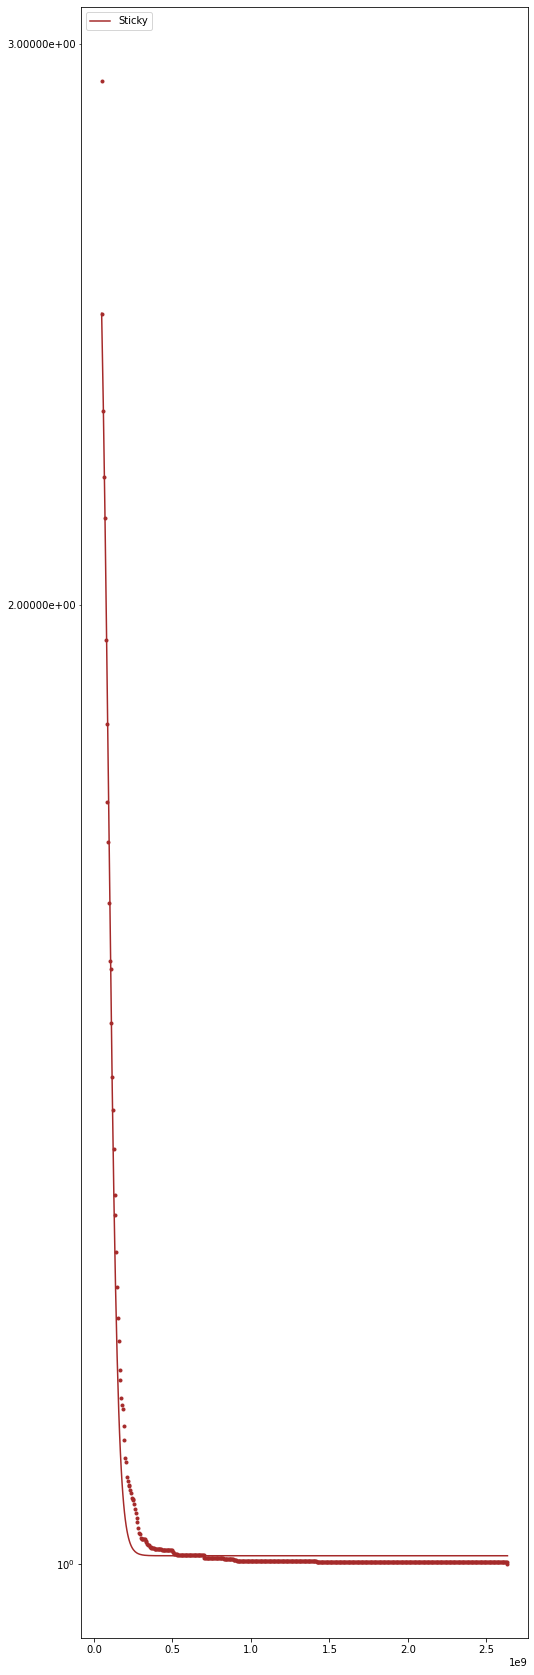

In [28]:
# sigma = default
x_s, y_s, popt_s = cdf_sigmoid_pair(data_list, data_name, factor, colors, tanh)     # y-axis = log scale

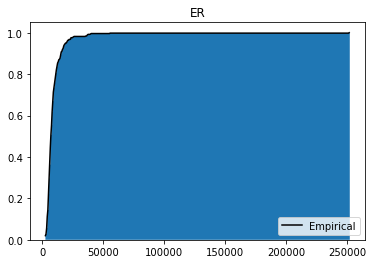

[ 0.04010314 28.59276642 -1.00319178]


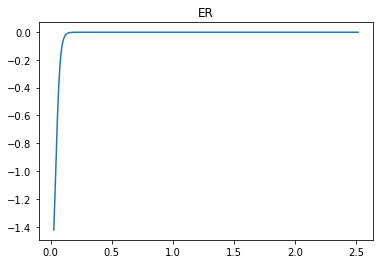

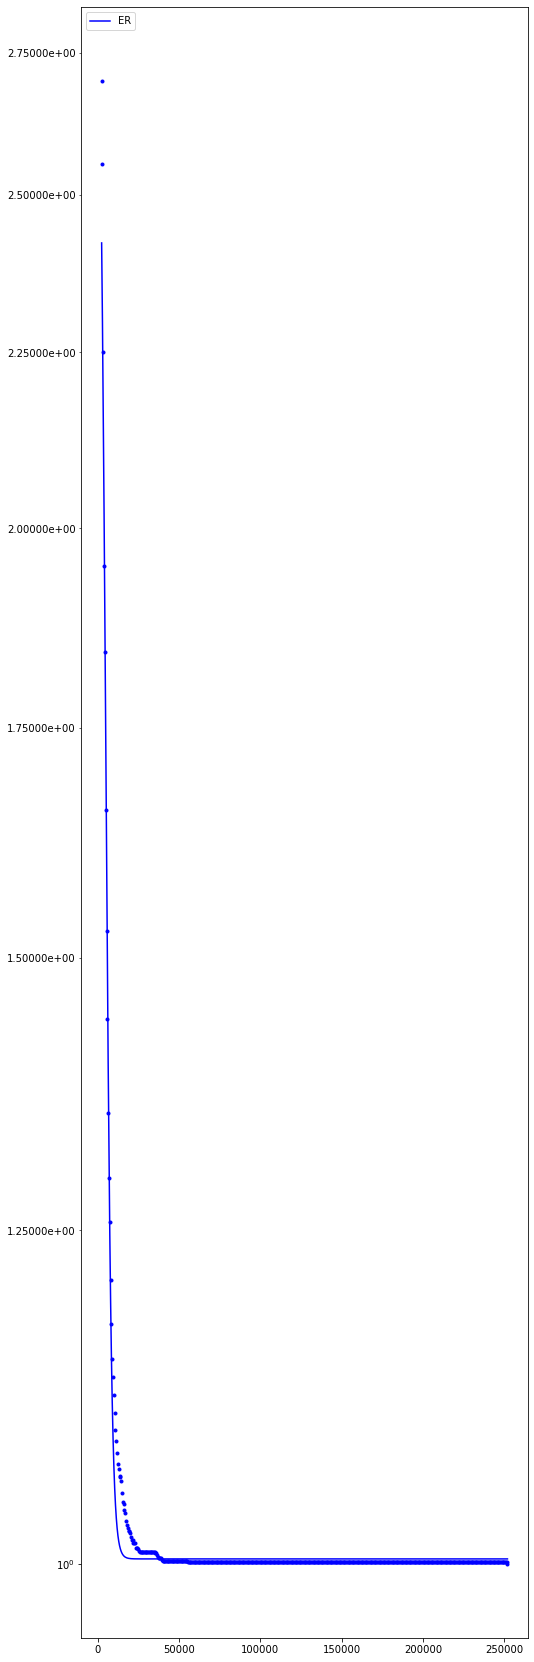

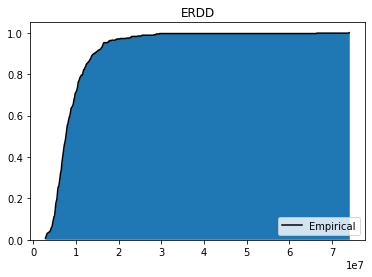

[ 0.47755264  2.94558743 -1.00747125]


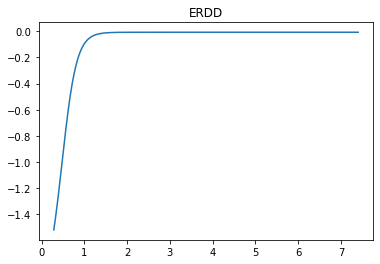

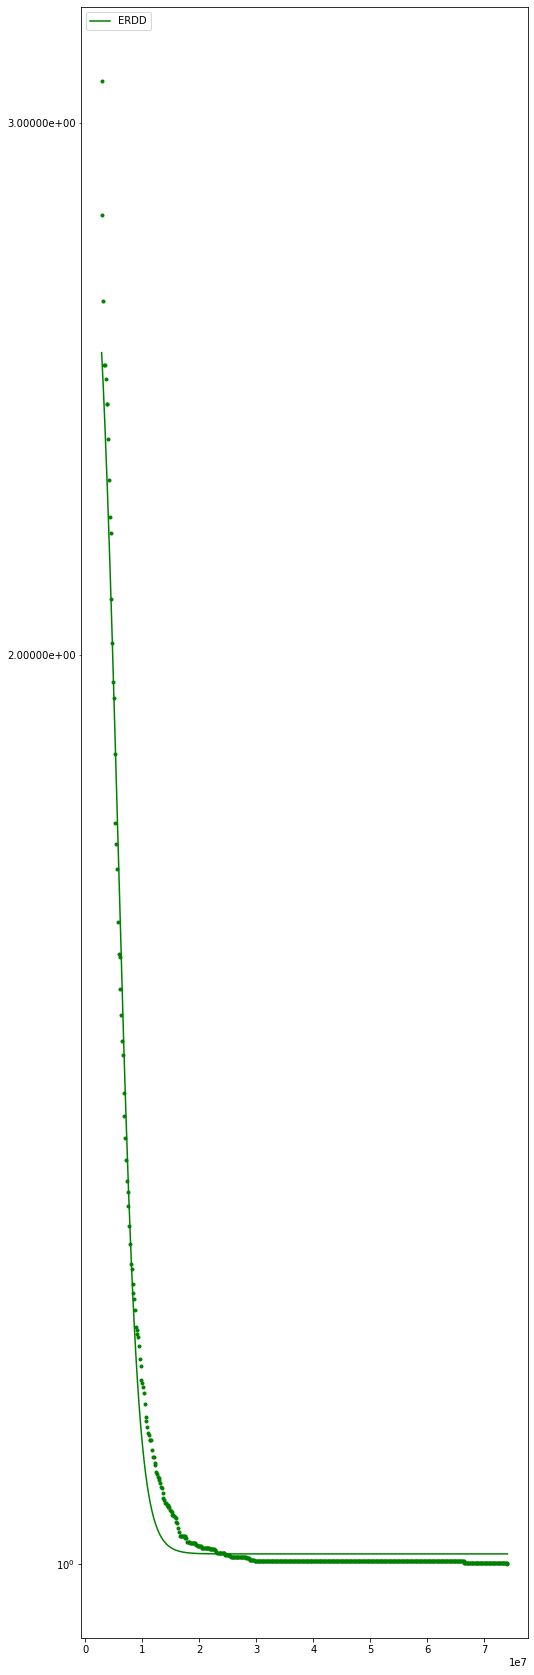

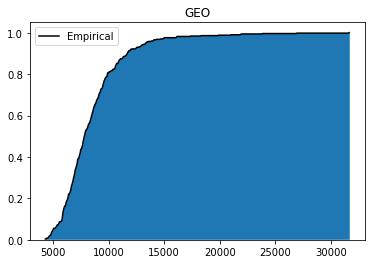

[ 0.5798955   4.3613051  -1.01079297]


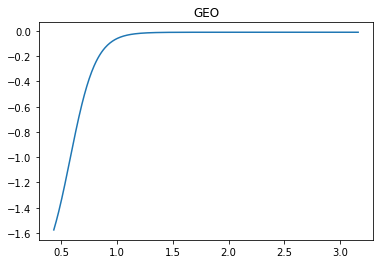

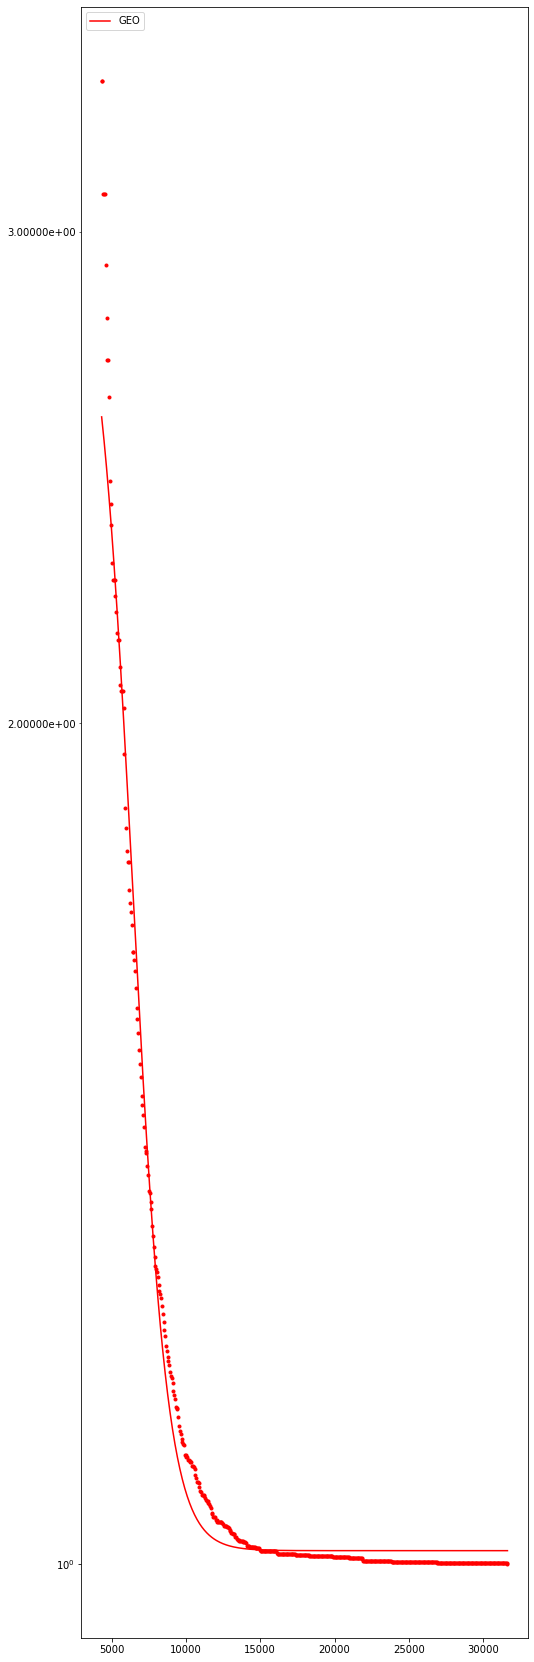

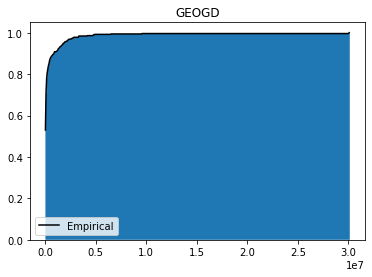

[-0.16904142  7.44180103 -1.00261292]


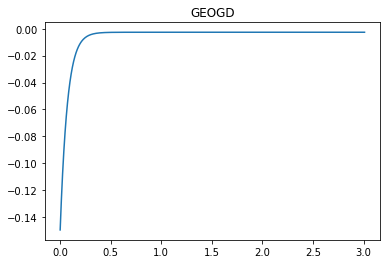

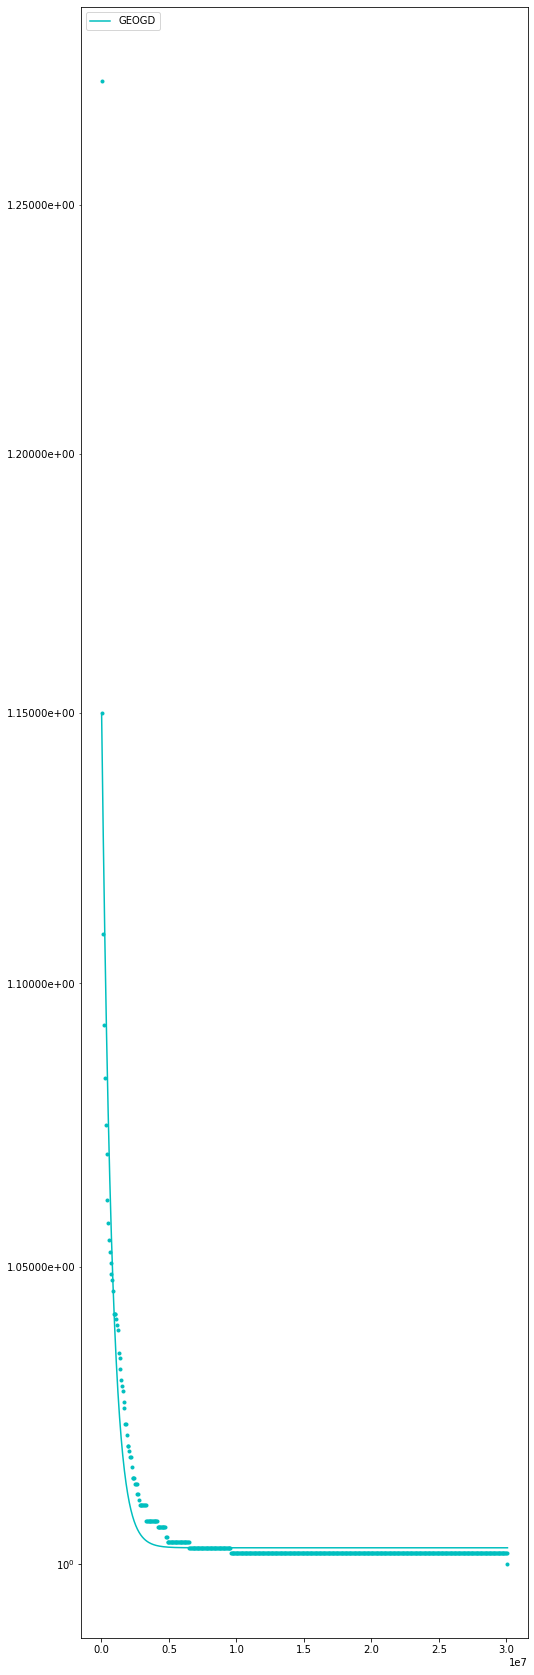

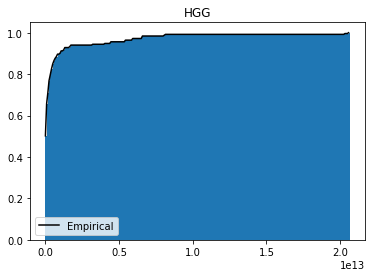

[-0.0907193  11.47506913 -1.00843661]


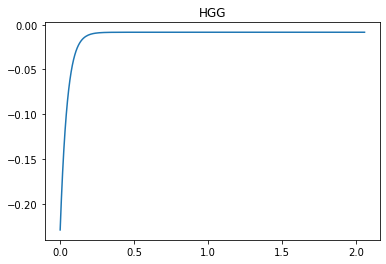

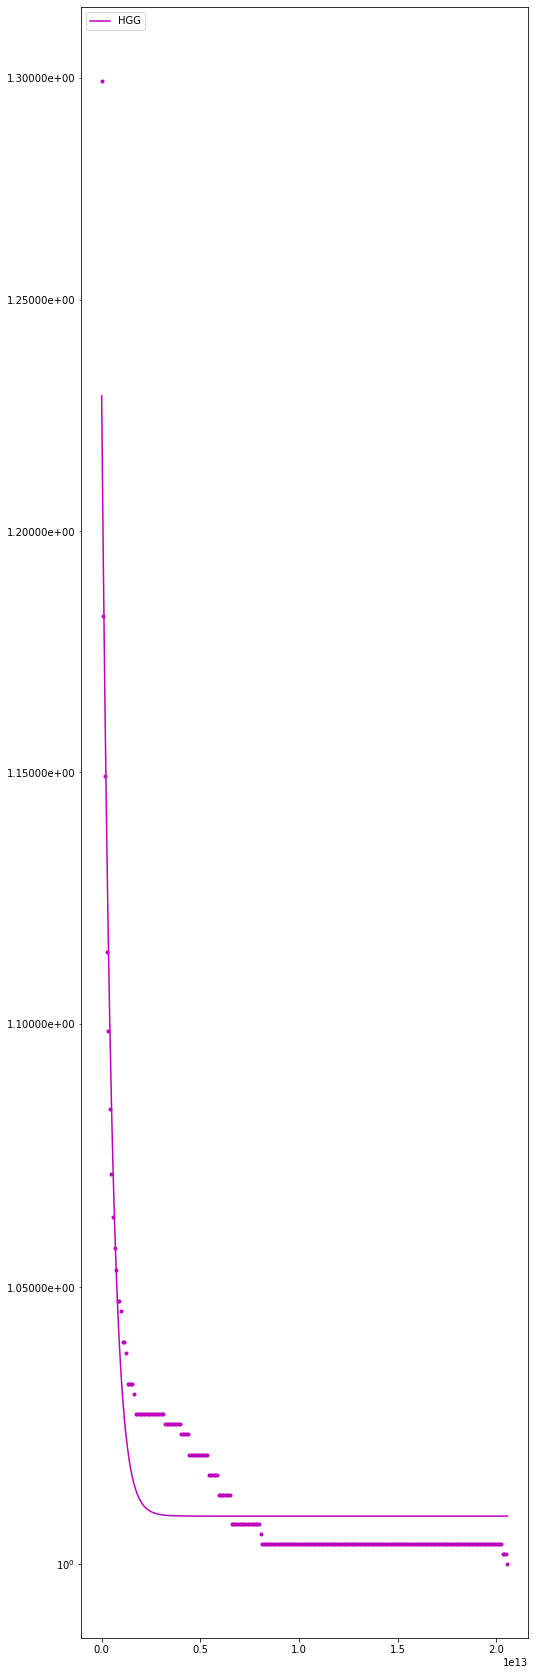

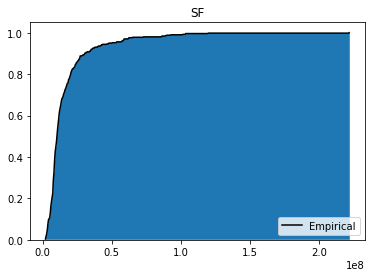

[ 0.0484249  14.87400208 -1.01006315]


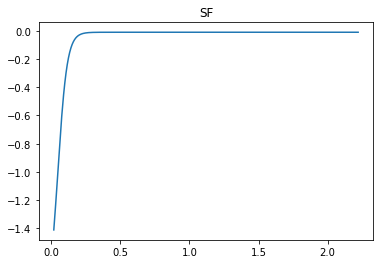

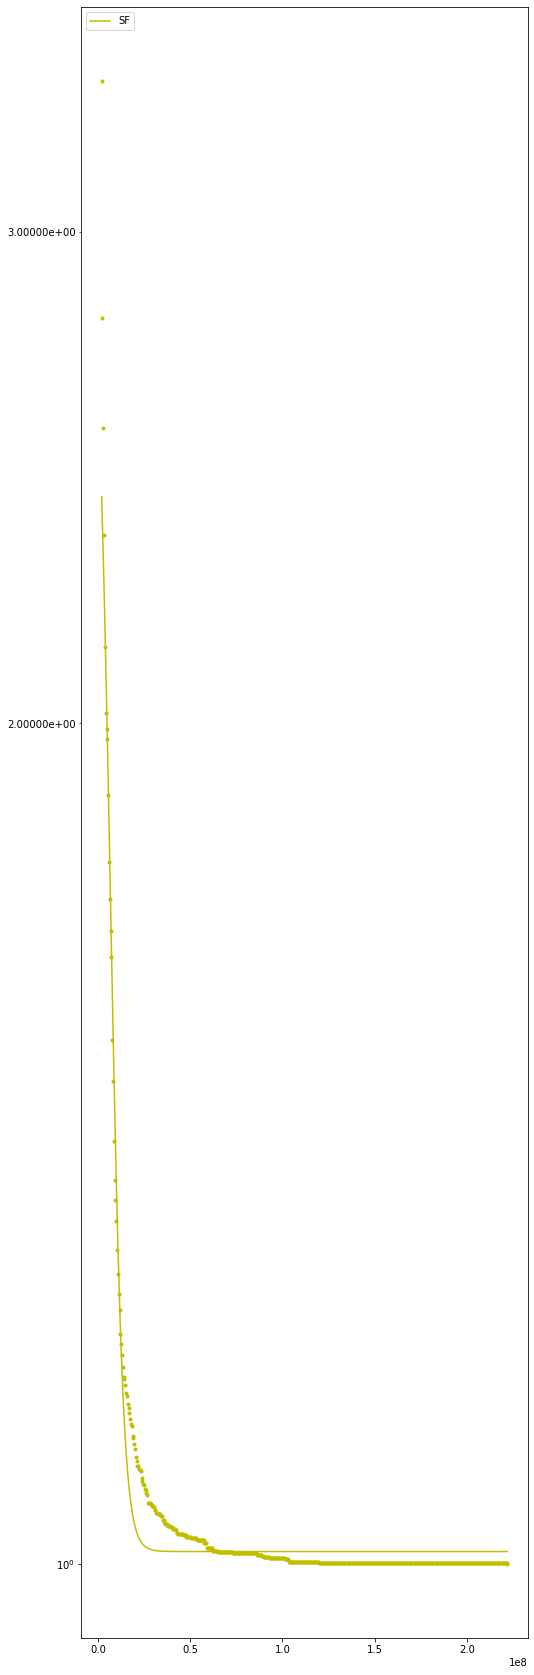

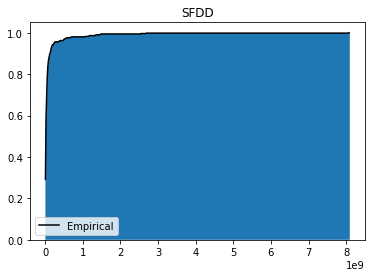

[-0.031321   17.17731547 -1.00302289]


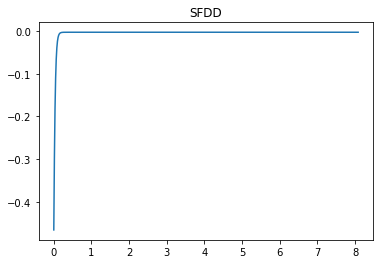

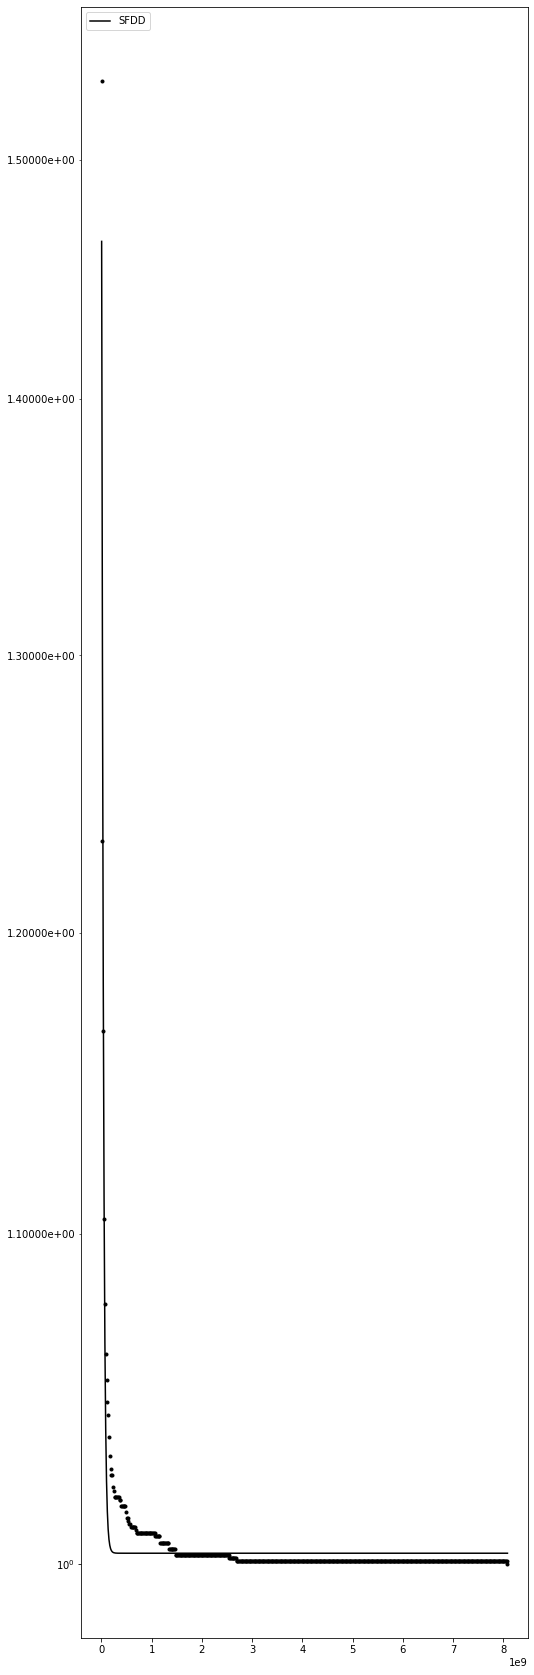

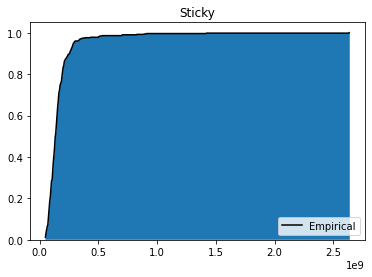

[ 0.07407282 14.64847037 -1.00398605]


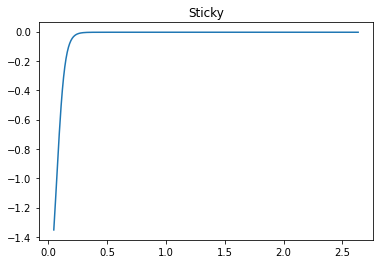

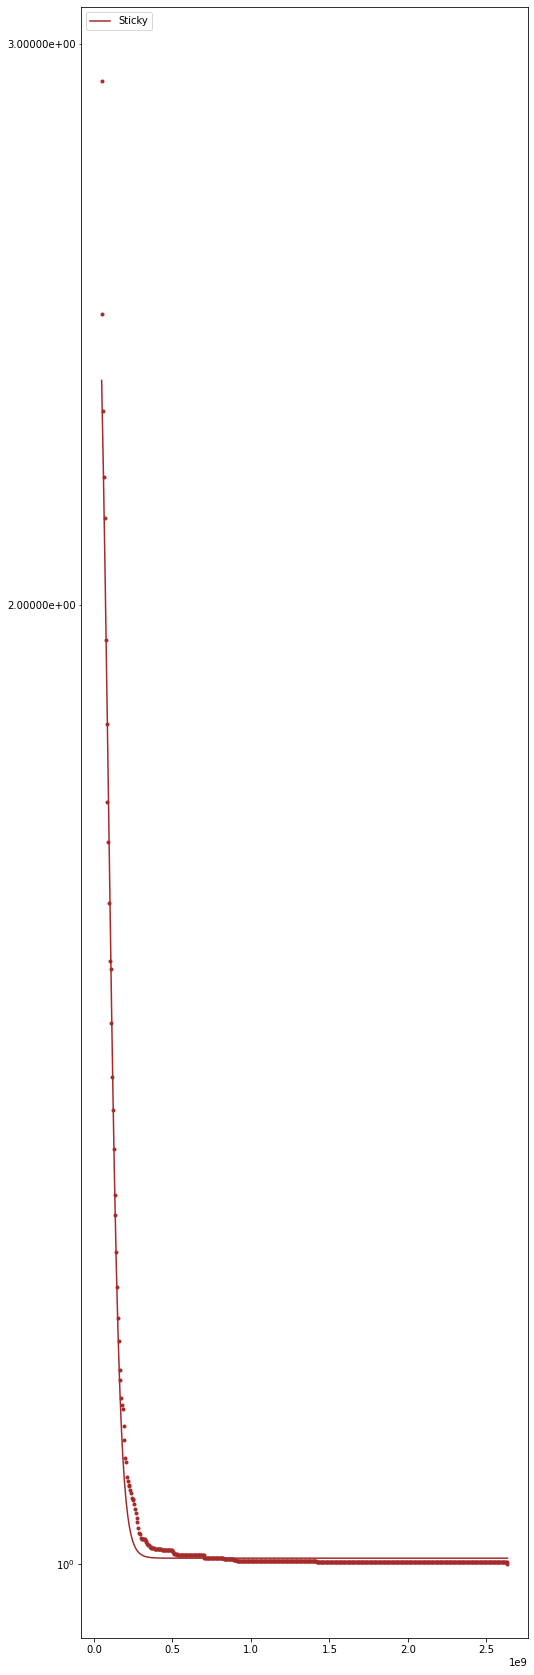

In [29]:
# sigma  = 1-y
x_s2, y_s2, popt_s2 = cdf_sigmoid_pair(data_list, data_name, factor, colors, tanh, True) 

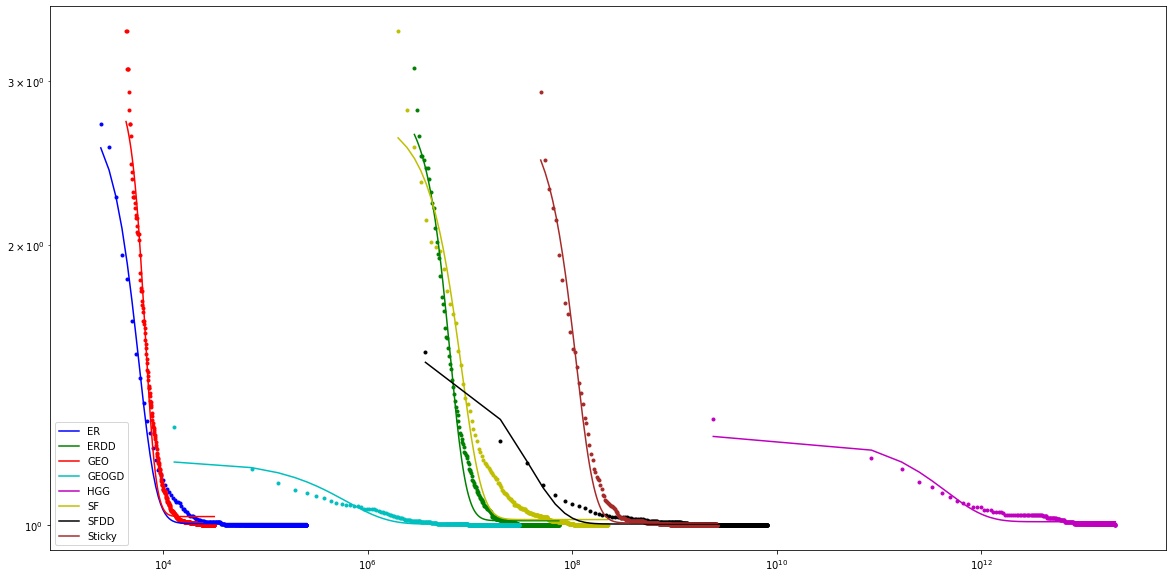

In [30]:
# sigma = default
pair_in_one(data_name, factor, colors, tanh, x_s, y_s, popt_s)   # all pair y-axis= normal scale

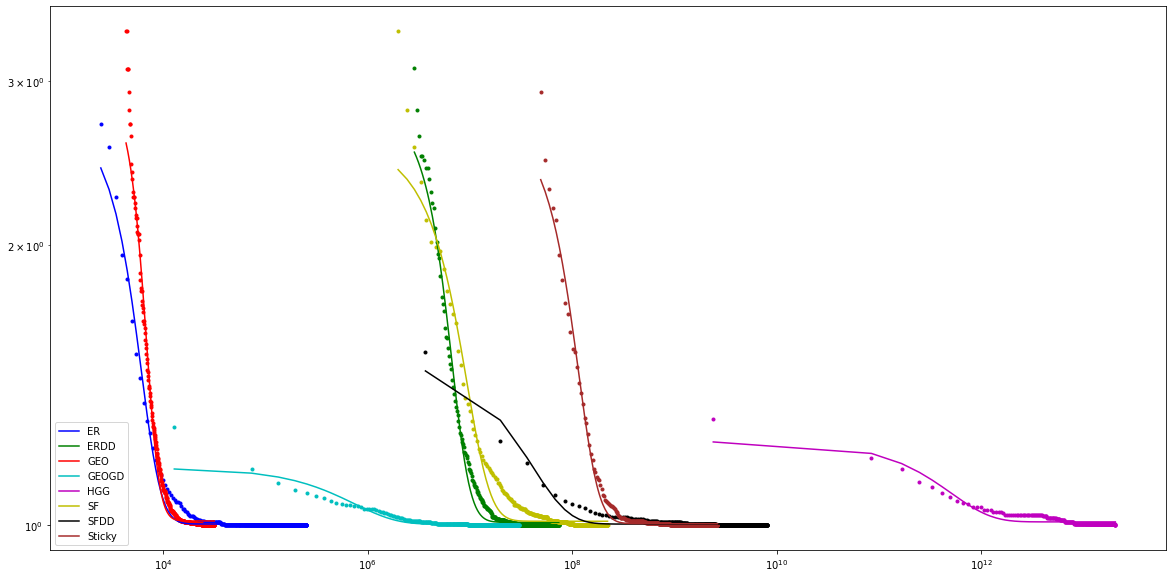

In [31]:
# sigma = 1-y
pair_in_one(data_name, factor, colors, tanh, x_s2, y_s2, popt_s2) 

# 3.6 more sigmoid on weighted-fitting

In [12]:
data_list = [ER,ERDD,GEO,GEOGD,HGG,SF,SFDD,Sticky]      # all read-in empirical AT data
data_name = ['ER','ERDD','GEO','GEOGD','HGG','SF','SFDD','Sticky']
sigmoid_list = [logistic, tanh, arctan, GD, ERF, algebra]
factor = [1e5,1e7,1e4,1e7,1e13,1e8,1e9,1e9]
colors = ['b','g','r','c','m','y','k','brown']